In [1]:
from tifffile import imread

from figure_utils import *

# Load image

In [2]:
# Load the image 
img = imread("../imgs/t000.tif")

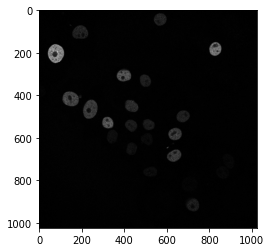

In [3]:
# Quick and dirty plot.
plt.imshow(img, cmap="gray")
plt.savefig("quick_figure.png")

# Save image at 300dpi with scalebar

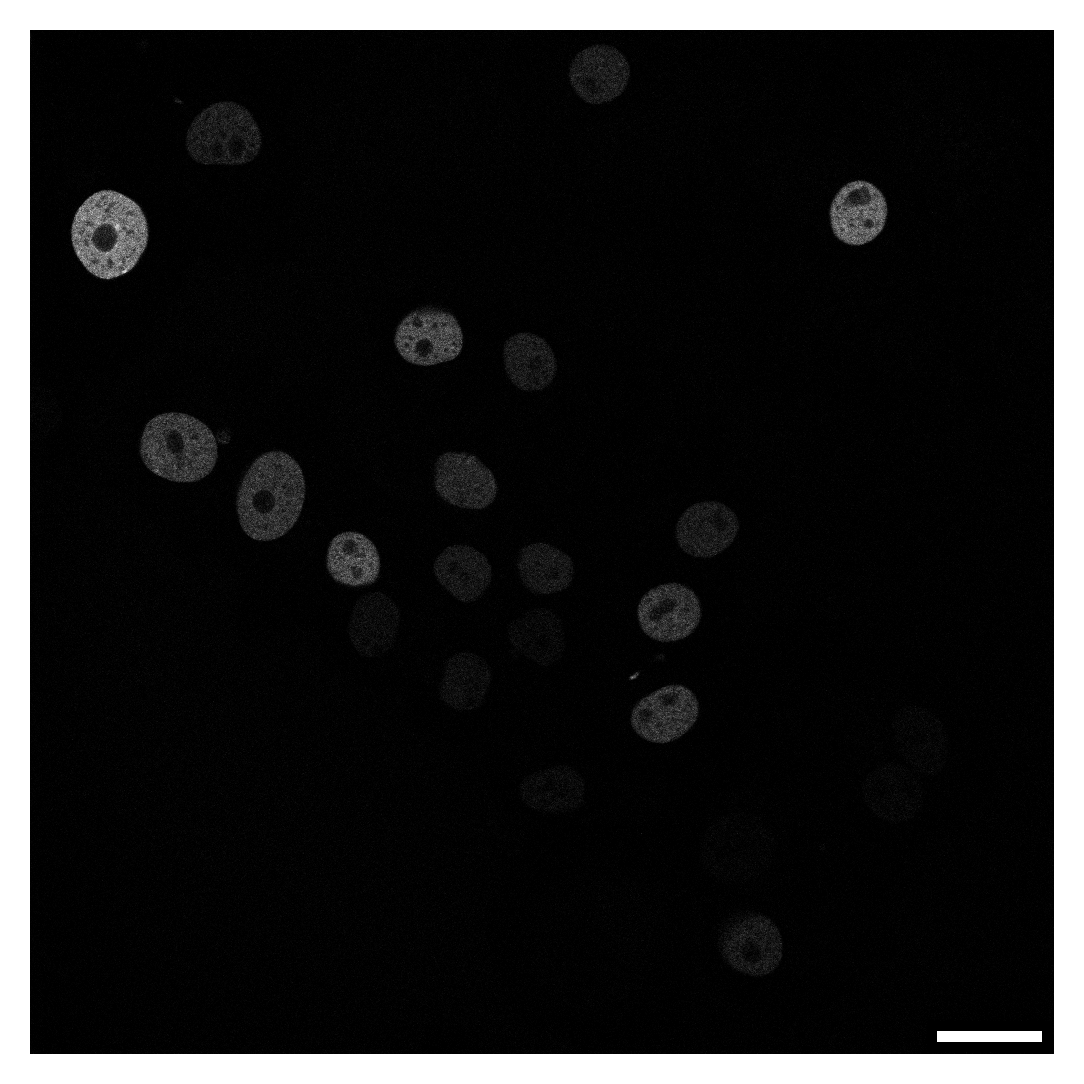

In [4]:
# Save an image at 300dpi with a scalebar as a figure.
# The figure size is computed based on the number of pixels provided by `img`.
# Note: All figure functions append the size (height, width) in cm at which the 
# resolution of the saved figure corresponds to the selected dpi (default = 300dpi) value.
create_img_figure_300dpi(save_path="simple_image_scalebar25um.png", 
                         img=img, 
                         pixel_size=0.24, 
                         scalebar_length=25)

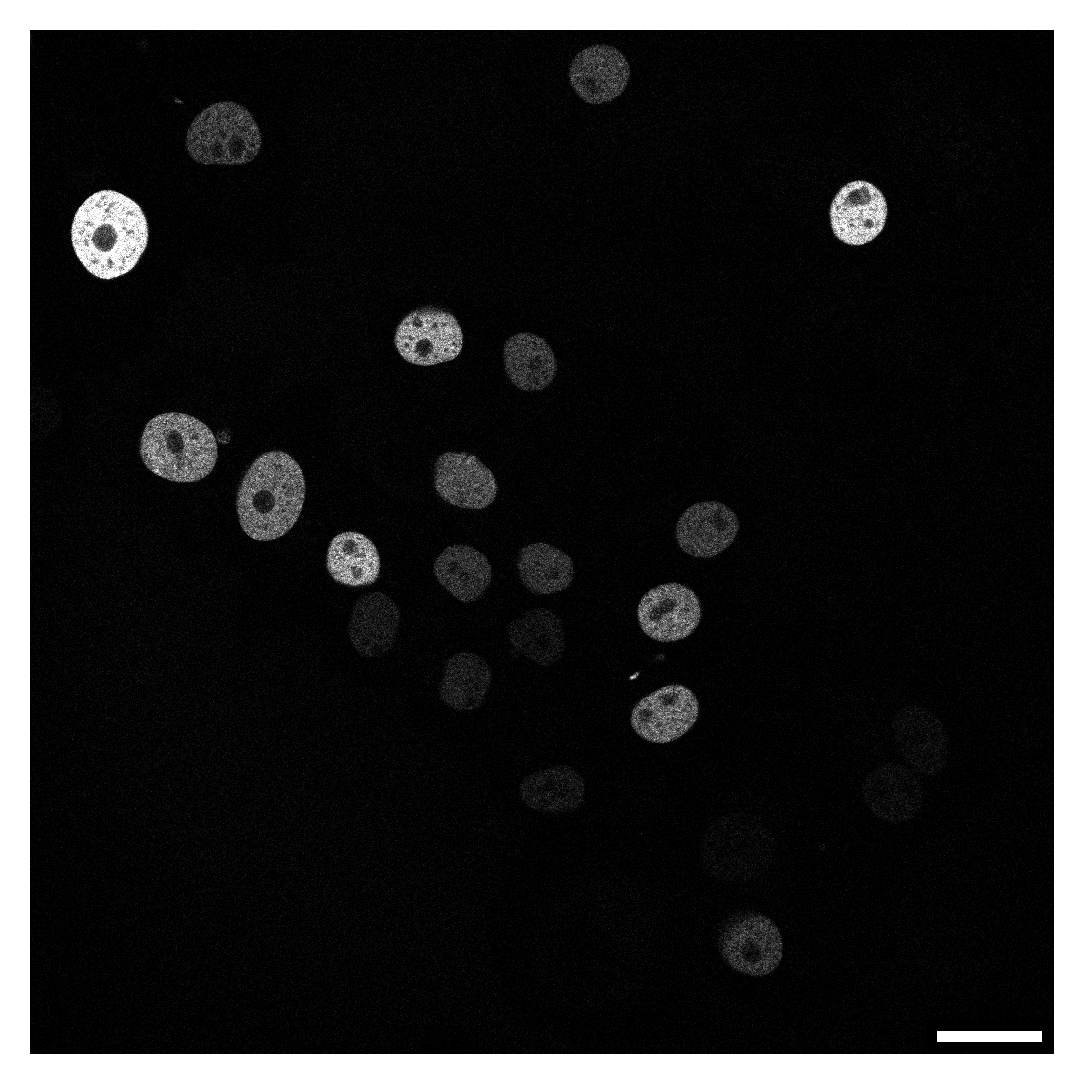

In [5]:
# Display range can be set via vmin and vmax
vmin, vmax = 0, 122
create_img_figure_300dpi(save_path="simple_image_scalebar25um.png", 
                         img=img, 
                         pixel_size=0.24, 
                         scalebar_length=25, 
                         vmin=vmin,
                         vmax=vmax)

# Save image with scalebar

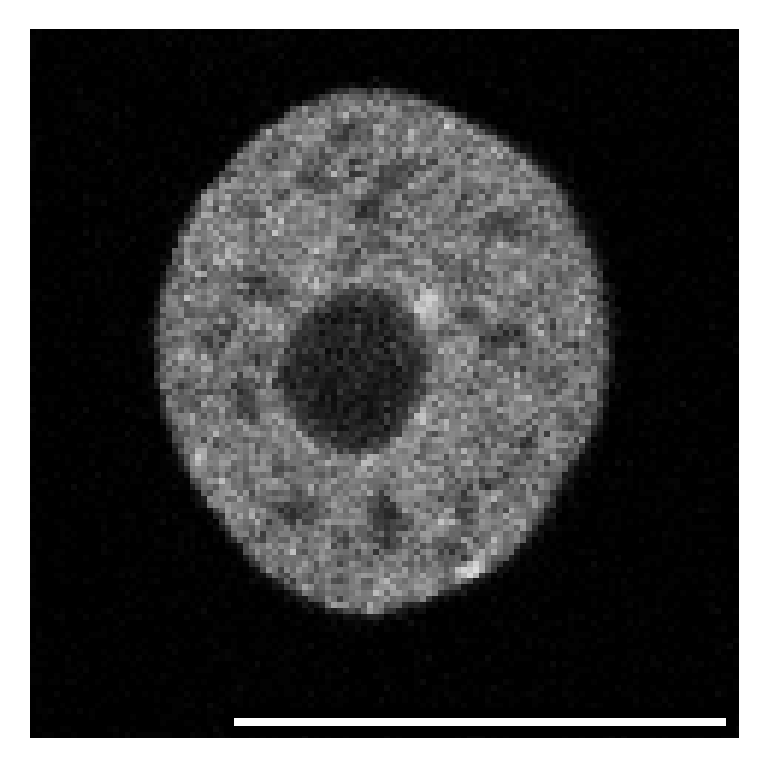

In [6]:
# With this function we can save an image in a figure with arbitrary size.
# If the image has not enough pixels to be saved at 300dpi, it will be upscaled
# with nearest neighbor interpolation.
create_img_figure(save_path="simple_image.png",
                  img=img[150:270,20:140],
                  width=6,
                  height=6,
                  pixel_size=0.24,
                  scalebar_length=20)

# Create colormaps
Colormaps map an intensity value to a specific color. Sometimes colormaps are also called lookup tables (LUTs).

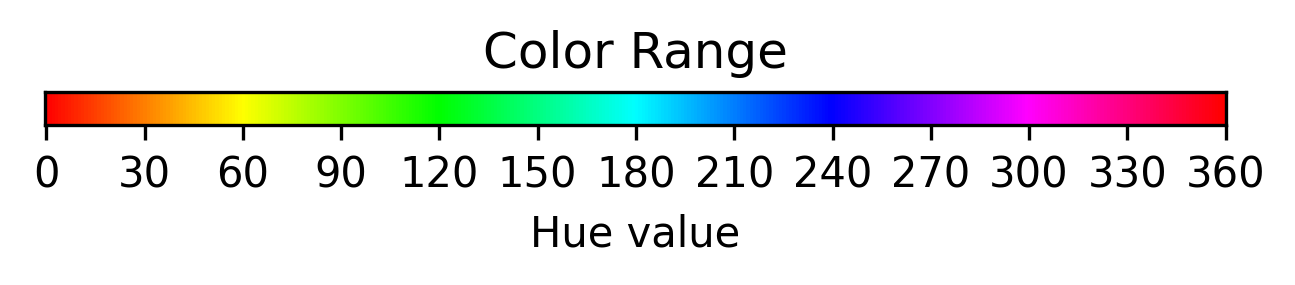

In [7]:
# Plotting all colors for given hue values
plot_color_range()

In [8]:
dapi_cmap = create_colormap_from_hue(190, "dapi")

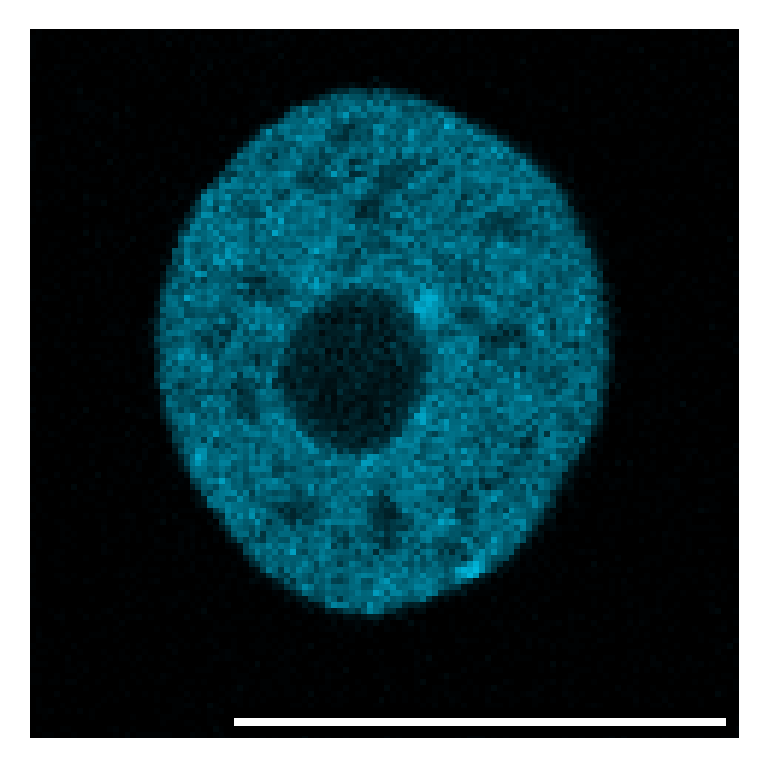

In [9]:
# Providing the dapi colormap
create_img_figure(save_path="dapi_nuclei_scalebar20um.png",
                  img=img[150:270,20:140],
                  width=6,
                  height=6,
                  pixel_size=0.24,
                  scalebar_length=20,
                  cmap=dapi_cmap)

# Save image at 300dpi with scalebar and inset

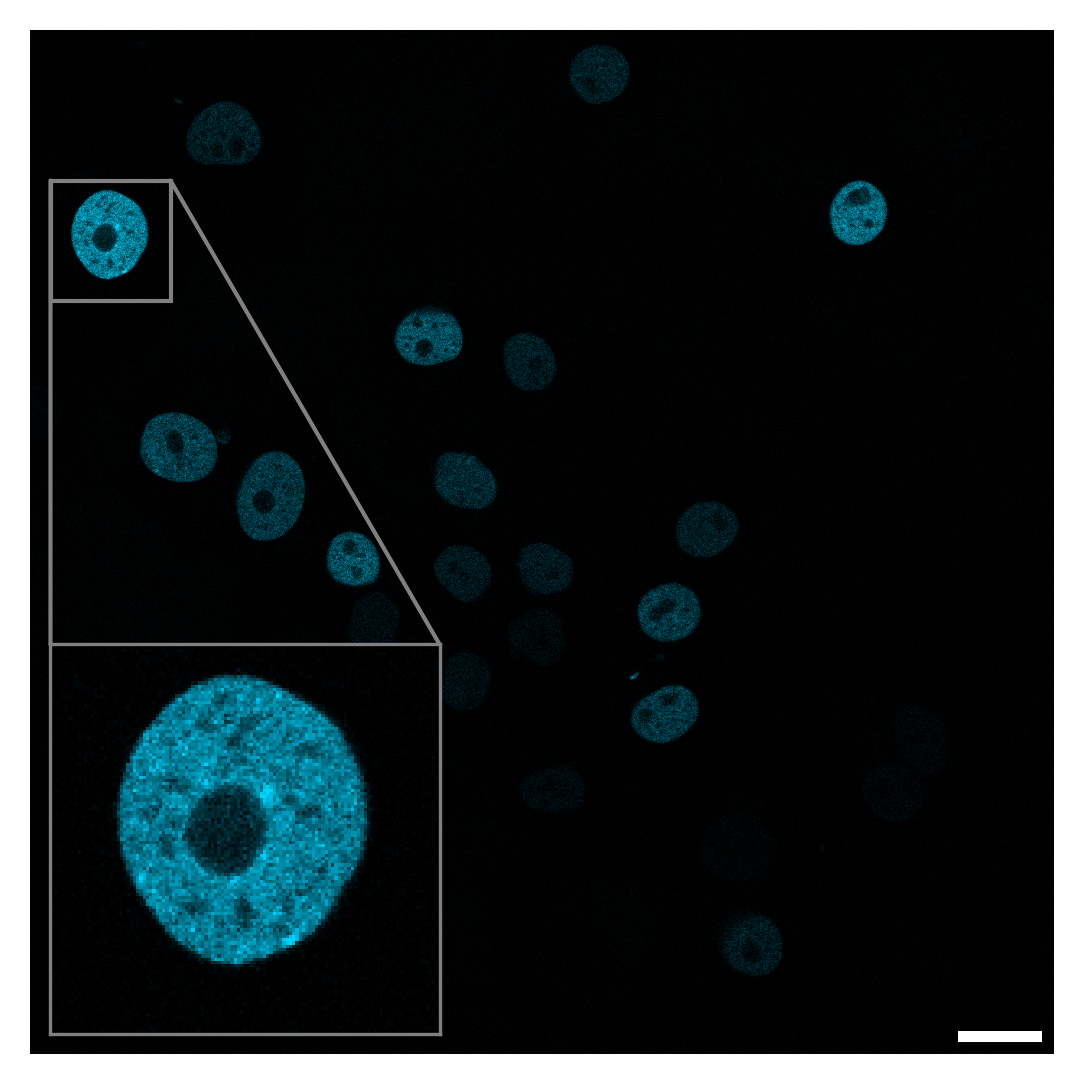

In [10]:
create_img_figure_with_inset_300dpi("overview_with_inset_scalebar20um.png", 
                                    img,
                                    pixel_size=0.24, scalebar_length=20,
                                    inset_center=[210, 80], 
                                    inset_size=[120,120],
                                    inset_relative_pos=[0.02, 0.02], 
                                    inset_relative_size=[0.38, 0.38],
                                    cmap=dapi_cmap,
                                    vmin=0,
                                    vmax=200)

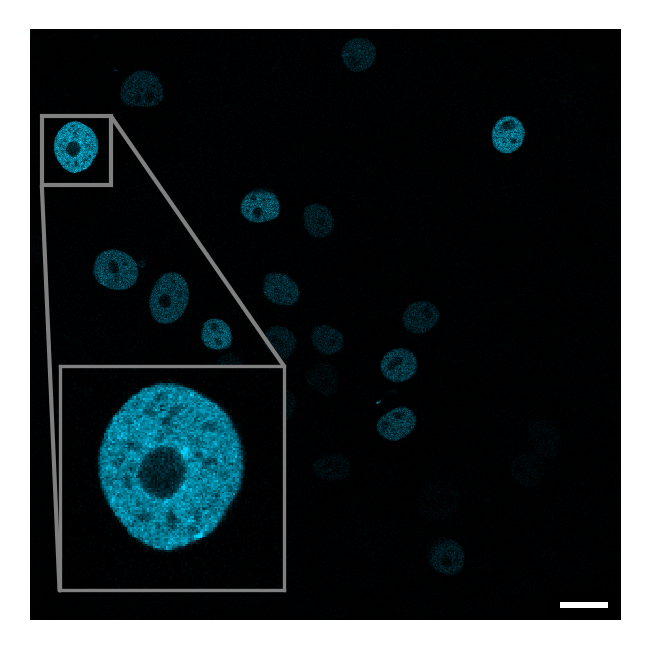

In [11]:
create_img_figure_with_inset("custom_sized_overview_with_inset_scalebar20um.png", 
                             img,
                             width=5, height=5,
                             pixel_size=0.24, scalebar_length=20,
                             inset_center=[210, 80], 
                             inset_size=[120,120],
                             inset_relative_pos=[0.05, 0.05], 
                             inset_relative_size=[0.38, 0.38],
                             cmap=dapi_cmap,
                             vmin=0,
                             vmax=200)

# Inverted figures

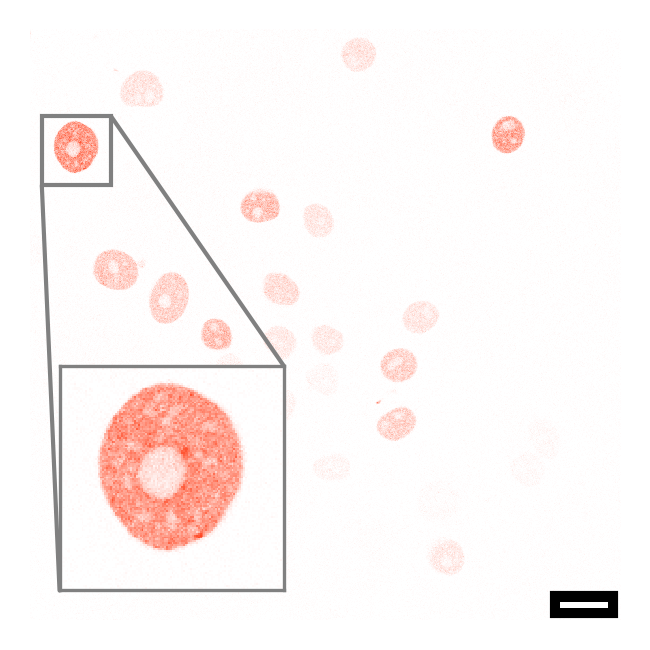

In [12]:
# First the dapi_colormap is applied to the image.
# The result is a RGBA (Y, X, 4) image.
# Note: RGBA stands for Red, Green, Blue, Alpha. Alpha represents the opacity.
rgba_img = dapi_cmap(img)

# Then we inverte the RGBA image.
inv_rgb_img = invert_rgba(rgba_img)

create_img_figure_with_inset("inverted_figure_scalebar20um.png", 
                             inv_rgb_img,
                             width=5, height=5,
                             pixel_size=0.24, scalebar_length=20,
                             inset_center=[210, 80], 
                             inset_size=[120,120],
                             inset_relative_pos=[0.05, 0.05], 
                             inset_relative_size=[0.38, 0.38],
                             cmap=None,
                             vmin=0,
                             vmax=200)

# Create multi-channel figure

In [13]:
# Create colormaps
reds = create_colormap_from_hue(0, "reds")
greens = create_colormap_from_hue(120, "greens")
blues = create_colormap_from_hue(240, "blues")

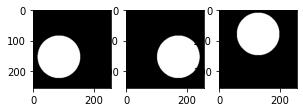

In [14]:
# Get three images of circles
circles = get_circles()

# This is how you can quickly plot things.
plt.figure(figsize=(cm2in(12), cm2in(4)))
plt.subplot(1,3,1)
plt.imshow(circles[0], cmap=get_gray_cmap())
plt.subplot(1,3,2)
plt.imshow(circles[1], cmap=get_gray_cmap())
plt.subplot(1,3,3)
plt.imshow(circles[2], cmap=get_gray_cmap())

In [15]:
# Apply reds, greens and blues colormaps to the circles 
# and merge them into a single RGBA image
rgba_circles = merge_channels(circles, [reds, greens, blues])

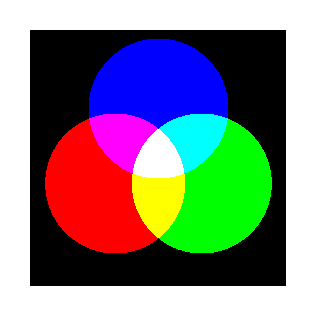

In [16]:
create_img_figure_300dpi("rgb_circles.png", 
                         rgba_circles, # This is already an RGBA image
                         pixel_size=1, 
                         scalebar_length=0, # Scalebar is hidden if length = 0
                         cmap=None) # cmap is set to None, which treat the RGBA image data as colorimage (RGB image).

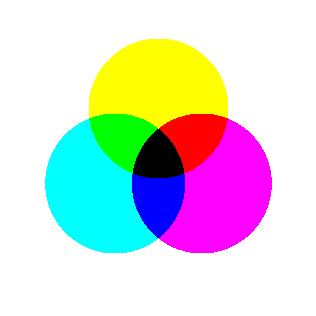

In [17]:
create_img_figure_300dpi('rgb_circles_inverted.png', 
                         invert_rgba(rgba_circles), 
                         pixel_size=1, 
                         scalebar_length=0, 
                         cmap=None)

## Add inset

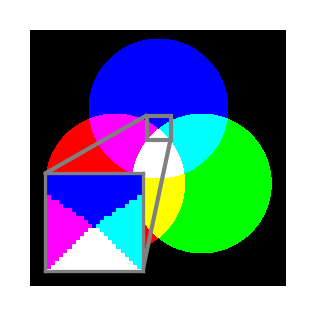

In [18]:
create_img_figure_with_inset_300dpi("rgb_circle_with_inset.png", 
                                    rgba_circles,
                                    pixel_size=1, 
                                    scalebar_length=0,
                                    inset_center=[97, 128], 
                                    inset_size=[25,25],
                                    inset_relative_pos=[0.06, 0.06], 
                                    inset_relative_size=[0.38, 0.38])